## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Import Methods

In [2]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')

## Importing the data

In [3]:
data = pd.read_csv('../input/car-sales-information/region25_en.csv')
data.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1513200 non-null  object 
 1   name                  1513200 non-null  object 
 2   bodyType              1513200 non-null  object 
 3   color                 1403466 non-null  object 
 4   fuelType              1509640 non-null  object 
 5   year                  1102226 non-null  float64
 6   mileage               1498720 non-null  float64
 7   transmission          1510135 non-null  object 
 8   power                 1492313 non-null  float64
 9   price                 1513200 non-null  int64  
 10  vehicleConfiguration  1102226 non-null  object 
 11  engineName            1101142 non-null  object 
 12  engineDisplacement    1092435 non-null  object 
 13  date                  1513200 non-null  object 
 14  location              1513200 non-

In [5]:
data.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'parse_date'],
      dtype='object')

In [6]:
data.shape

(1513200, 17)

## Check missing

In [7]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
engineDisplacement,420765,27.81,object
engineName,412058,27.23,object
year,410974,27.16,float64
vehicleConfiguration,410974,27.16,object
color,109734,7.25,object
power,20887,1.38,float64
mileage,14480,0.96,float64
fuelType,3560,0.24,object
transmission,3065,0.20,object


In [8]:
data = data.dropna()

In [9]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype


In [10]:
data.shape

(1002096, 17)

## Variable transformation

     Relacing the unwanted symbol (LTR) to can convert type to numeric

In [11]:
data['engineDisplacement'] = data['engineDisplacement'].str.replace('LTR', '')
data['engineDisplacement'] = pd.to_numeric(data['engineDisplacement'], errors='coerce')

## Drop Unused columns

In [12]:
data.drop(['date', 'location', 'parse_date', 'link', 'name', 'vehicleConfiguration'], axis=1, inplace=True)

## Check Nums and Objects Columns

In [13]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns

In [14]:
print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['year', 'mileage', 'power', 'price', 'engineDisplacement'], dtype='object')

Object Columns : Index(['brand', 'bodyType', 'color', 'fuelType', 'transmission', 'engineName'], dtype='object')


## Show distribution of columns 

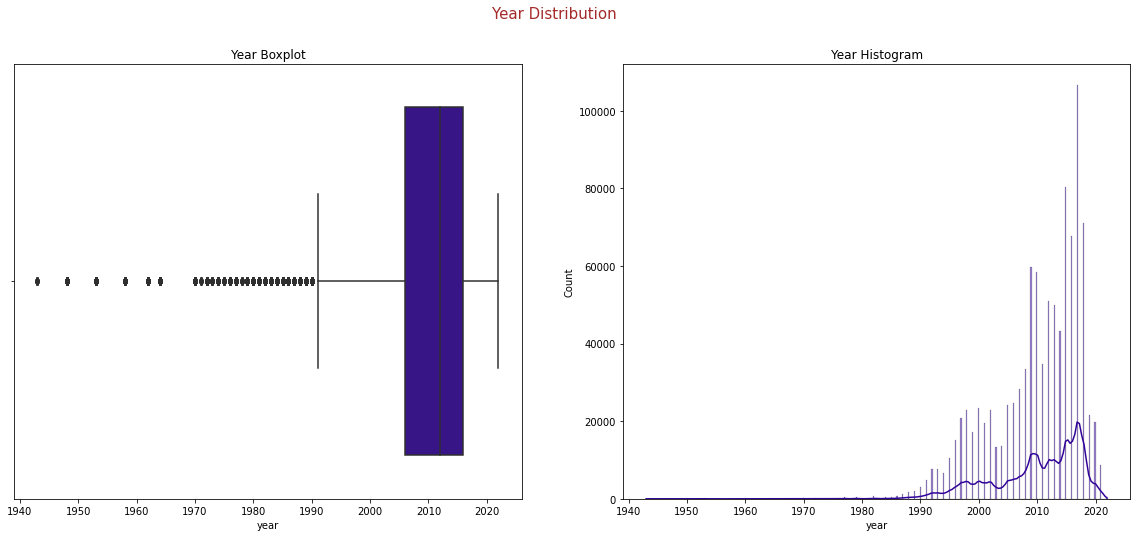

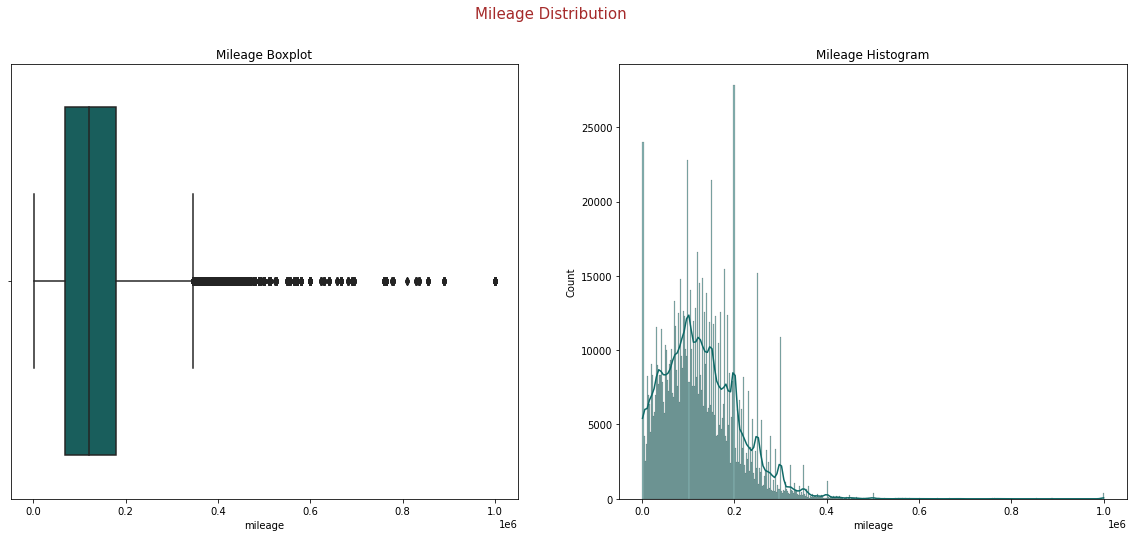

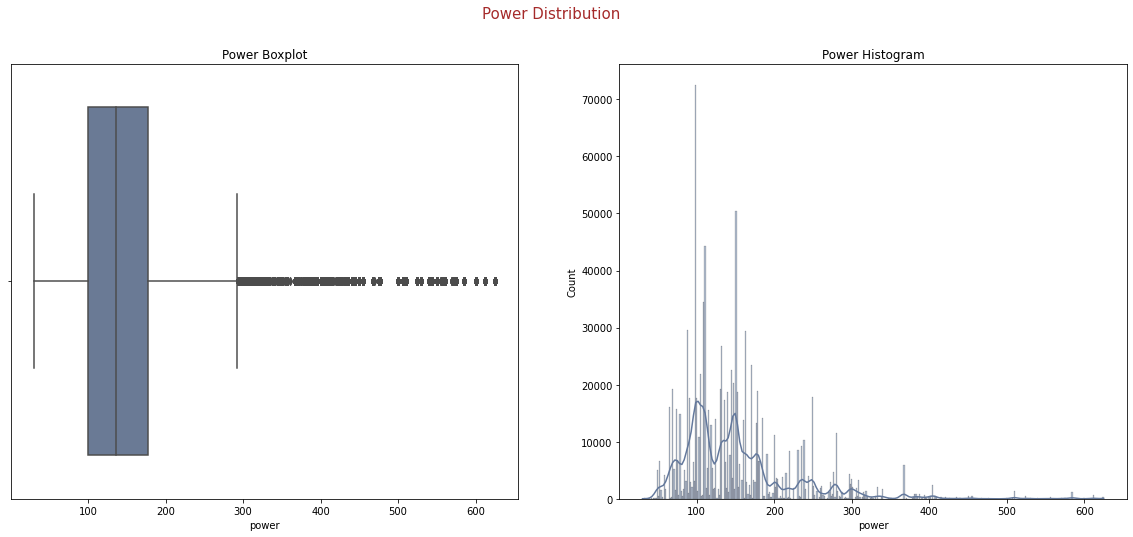

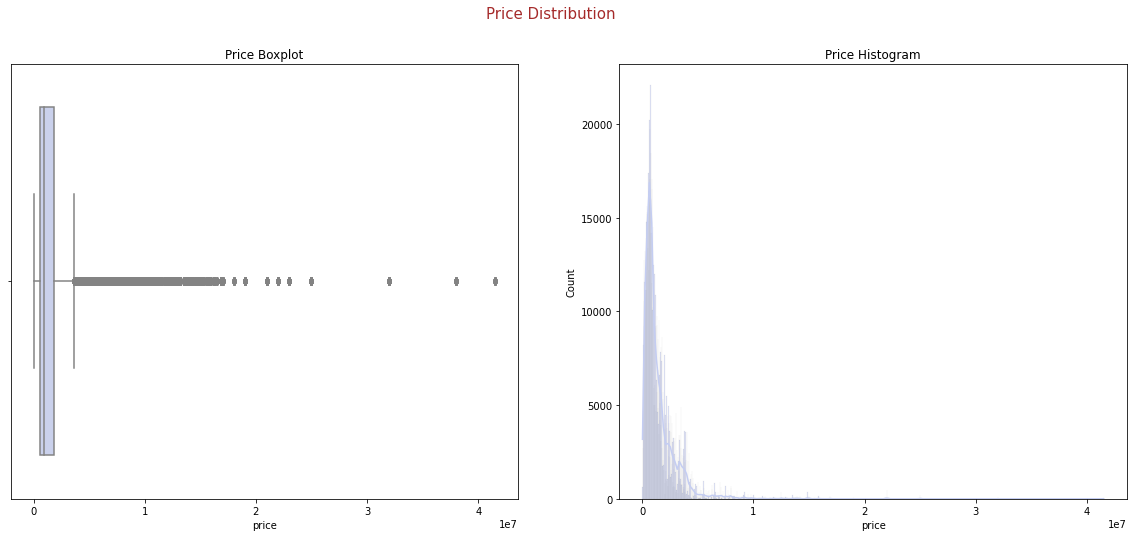

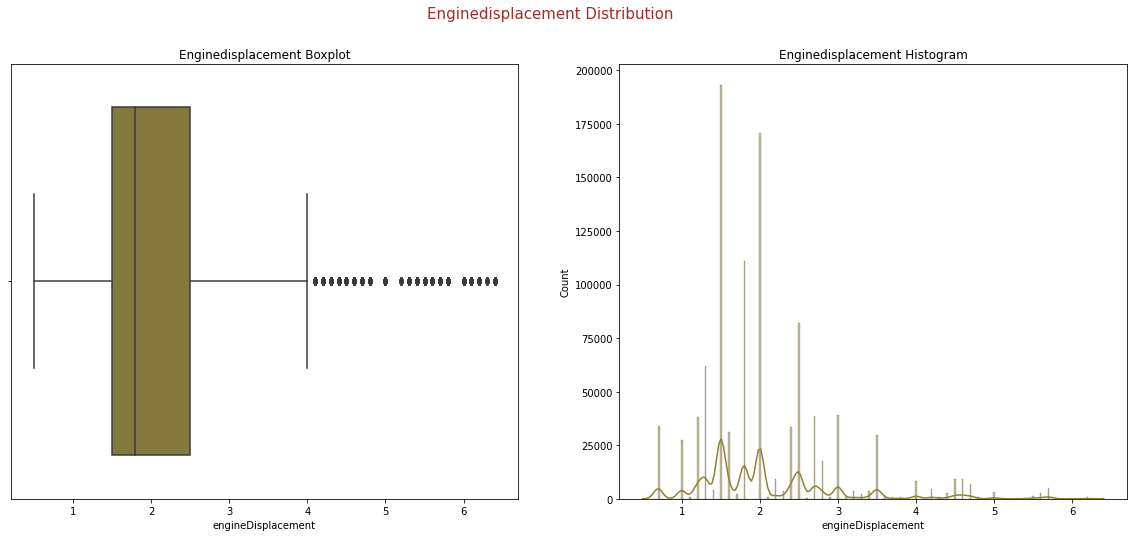

In [15]:
for i in num_cols:
    show_distribution(data, i)

## Looking into the values in each column

In [16]:
for i in obj_cols:
    print(f'{i} unique number : {data[i].nunique()}', end='\n\n')
    print(f'{i} unique values : {data[i].unique()}', end='\n\n')
    print(data[i].value_counts()[:10])
    print('======================================================')

brand unique number : 61

brand unique values : ['Mercedes-Benz' 'Lexus' 'Nissan' 'Toyota' 'Honda' 'Mazda' 'Hyundai'
 'Infiniti' 'Daihatsu' 'Suzuki' 'Mitsubishi' 'Ford' 'Skoda' 'Lincoln'
 'Subaru' 'BMW' 'SsangYong' 'Jeep' 'Land Rover' 'Haval' 'Mini' 'Maserati'
 'Audi' 'Lada' 'GAZ' 'Volkswagen' 'Dodge' 'Isuzu' 'Chrysler' 'Chevrolet'
 'Kia' 'Porsche' 'ZAZ' 'Daewoo' 'Renault' 'Hummer' 'Genesis' 'Smart' 'UAZ'
 'Cadillac' 'Opel' 'Citroen' 'IZh' 'Acura' 'Volvo' 'Exeed' 'Moskvich'
 'Chery' 'Jaguar' 'LuAZ' 'Bentley' 'Ram' 'Peugeot' 'Rover' 'Datsun'
 'Vortex' 'Ferrari' 'Mitsuoka' 'Zotye' 'Geely' 'Fiat']

Toyota           479512
Honda            136029
Nissan           107927
Lexus             50805
Subaru            38359
Mitsubishi        34684
Suzuki            29861
Mazda             24357
Mercedes-Benz     23816
Daihatsu          14796
Name: brand, dtype: int64
bodyType unique number : 11

bodyType unique values : ['jeep 5 doors' 'hatchback 5 doors' 'minivan' 'sedan' 'station wagon'
 'coupe

## 

## Handle engineName column

In [17]:
counts = data['engineName'].value_counts()
idx = counts[counts.lt(100)].index

data.loc[data['engineName'].isin(idx), 'engineName'] = 'Others'

In [18]:
data['engineName'].value_counts()

2ZR-FXE           60172
1NZ-FE            48167
LEB               33559
2TR-FE            31564
1NZ-FXE           22544
                  ...  
F18D4, Z18XER       102
1KD-FTV             102
TD27                102
1ND-TV              101
M 176 DE 40 AL      100
Name: engineName, Length: 518, dtype: int64

In [19]:
data.head()

,brand,bodyType,color,fuelType,year,mileage,transmission,power,price,engineName,engineDisplacement
2,Mercedes-Benz,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,M 276 DE 30 AL,3.0
3,Mercedes-Benz,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,M 113 E 50,5.0
5,Lexus,jeep 5 doors,burgundy,Gasoline,2016.0,150000.0,AT,301.0,3500000,2GR-FKS,3.5
8,Nissan,hatchback 5 doors,grey,Gasoline,2016.0,58000.0,CVT,79.0,850000,HR12DE,1.2
10,Toyota,jeep 5 doors,white,Gasoline,2017.0,20000.0,AT,231.0,3300000,8AR-FTS,2.0


## Analysis all columns

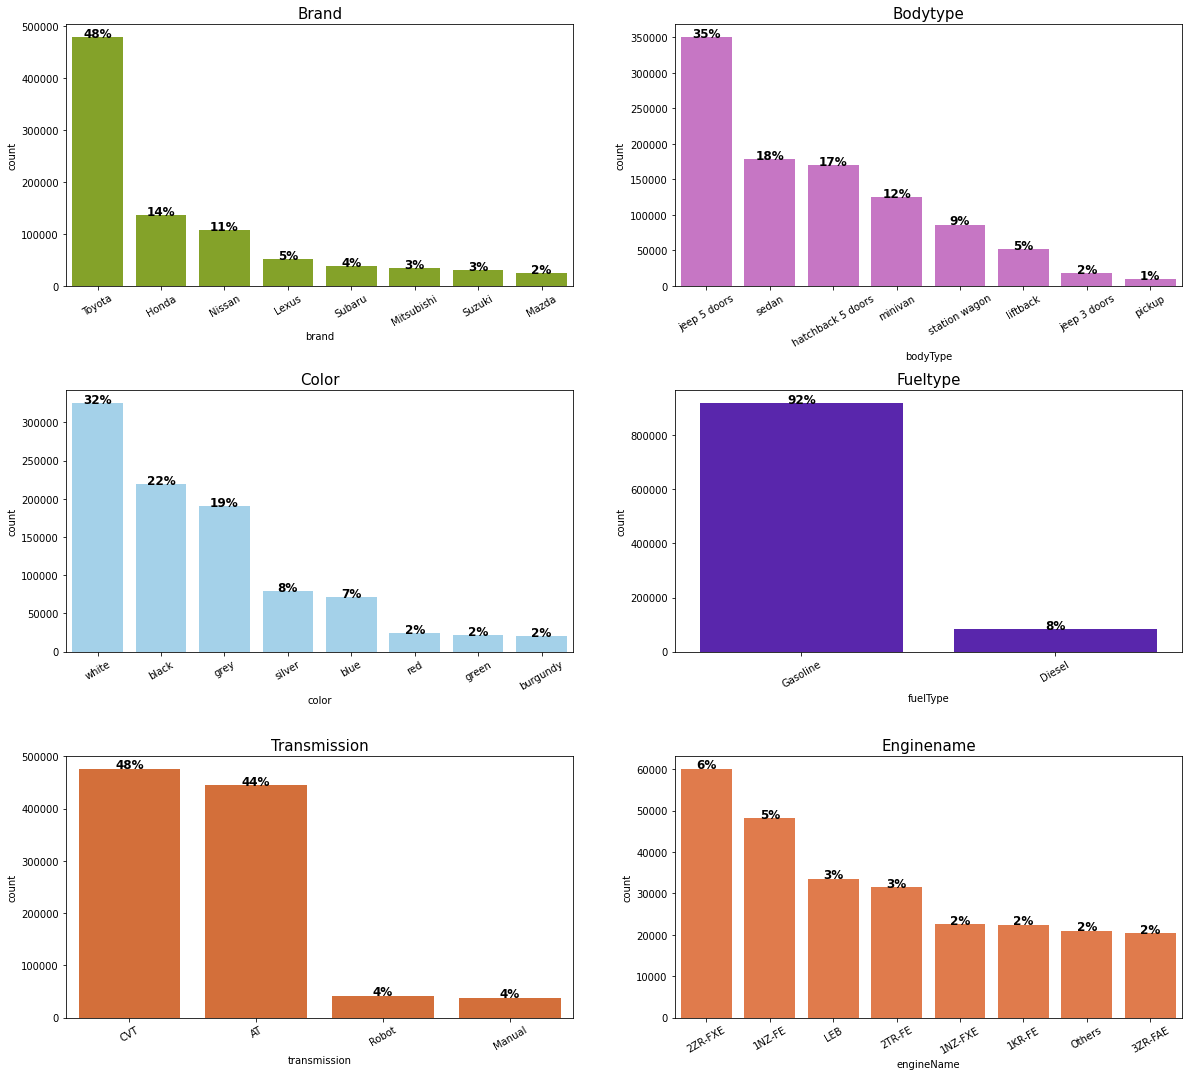

In [20]:
plt.figure(figsize=(20,25))

for i in range(len(obj_cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(data=data, x=obj_cols[i], order=data[obj_cols[i]].value_counts().index[:8], color=generate_colors(1)[0])
    plt.title(obj_cols[i].title(), fontsize=15)
    plt.xticks(rotation=30)
    
    for p in ax.patches:
        height=p.get_height()
        percent=(height*100)/float(len(data))
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=12)
        
plt.subplots_adjust(hspace=0.4)

# Modilng

## Split the data

In [21]:
x = data.drop('price', axis=1)
y = data['price']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42, test_size=0.2)

## Encoeder cat columns

In [22]:
oe = OrdinalEncoder()
x_train[obj_cols] = oe.fit_transform(x_train[obj_cols])
x_valid[obj_cols] = oe.transform(x_valid[obj_cols])

## Use LinearRegression Model

In [23]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print(f'Training Score : {linear_model.score(x_train, y_train)}')
print(f'Validation Score : {linear_model.score(x_valid, y_valid)}')

y_pred = linear_model.predict(x_valid)
print(mean_absolute_error(y_valid, y_pred))

Training Score : 0.6090262648483511
Validation Score : 0.6145331394463512
564902.2865399979


## Use RandomForestRegressor Model

In [24]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

print(f'Training Score : {rfr_model.score(x_train, y_train)}')
print(f'Validation Score : {rfr_model.score(x_valid, y_valid)}')

y_pred = rfr_model.predict(x_valid)
print(mean_absolute_error(y_valid, y_pred))

Training Score : 0.9977042872233767
Validation Score : 0.9978378999918421
22436.47163368761


## Check results of MultiRegression and rfr models

In [27]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [28]:
## LinearRegression
regression_results(y_valid, linear_model.predict(x_valid))

explained_variance:  0.6145
r2:  0.6145
MAE:  564902.2865
MSE:  1075736987269.1866
RMSE:  1037177.4136


In [29]:
## RandomForestRegressor
regression_results(y_valid, rfr_model.predict(x_valid))

explained_variance:  0.9978
r2:  0.9978
MAE:  22436.4716
MSE:  6033854494.2873
RMSE:  77677.8894


## So RandomForestRegressor is the best one with acc 99% in train and test data

## 